In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import math
from pyproj import Geod

P1 = [6.573832039, 46.521592273]
P2 = [6.575116326, 46.521954786]
E = [6.573944444, 46.521330555]

P1_FILE = "original/Report_P1.xlsx"
P2_FILE = "original/Report_P2.xlsx"

In [2]:
def transform_to_rad(zero, coords):
    # TODO: write this better
    # TODO: test this
    zero_long, zero_lat = zero
    coords_long, coords_lat = coords
    g = Geod(ellps='WGS84') # Initiate Geode based on WGS84
    a, phi, d = g.inv(zero_long, zero_lat, coords_long, coords_lat)
    #print(phi)
    return [d, math.radians(phi)]

In [3]:
df_p1 = pd.read_excel(P1_FILE, header=1).loc[:, ["Longitude", "Latitude"]]
df_p2 = pd.read_excel(P2_FILE, header=1).loc[:, ["Longitude", "Latitude"]]

df_p1["Distance"] = df_p1.apply(lambda x: transform_to_rad(P1, [x["Longitude"], x["Latitude"]])[0], axis=1)
df_p1["Angle"] = df_p1.apply(lambda x: transform_to_rad(P1, [x["Longitude"], x["Latitude"]])[1], axis=1)

df_p2["Distance"] = df_p2.apply(lambda x: transform_to_rad(P2, [x["Longitude"], x["Latitude"]])[0], axis=1)
df_p2["Angle"] = df_p2.apply(lambda x: transform_to_rad(P2, [x["Longitude"], x["Latitude"]])[1], axis=1)

display(df_p1)
display(df_p2)

,Longitude,Latitude,Distance,Angle
0,6.574031,46.521378,28.294013,-0.568500
1,6.574017,46.521367,28.803553,-0.514208
2,6.573981,46.521378,26.427016,-0.445851
3,6.573981,46.521378,26.427016,-0.445851
4,6.573981,46.521378,26.427016,-0.445851
...,...,...,...,...
362,6.573925,46.521375,25.183714,-0.287174
363,6.573950,46.521369,26.371937,-0.350344
364,6.573886,46.521331,29.387276,-0.141659
365,6.573883,46.521336,28.746071,-0.137352


,Longitude,Latitude,Distance,Angle
0,6.574639,46.521964,36.648526,1.598407
1,6.574639,46.521964,36.648526,1.598407
2,6.574639,46.521964,36.648526,1.598407
3,6.574639,46.521964,36.648526,1.598407
4,6.574581,46.521947,41.119172,1.550344
...,...,...,...,...
327,6.573892,46.522147,96.374063,1.794616
328,6.573892,46.522147,96.374063,1.794616
329,6.573892,46.522147,96.374063,1.794616
330,6.573894,46.522147,96.166248,1.795108


Text(30.344572744546294, -0.28821163268523764, 'E')

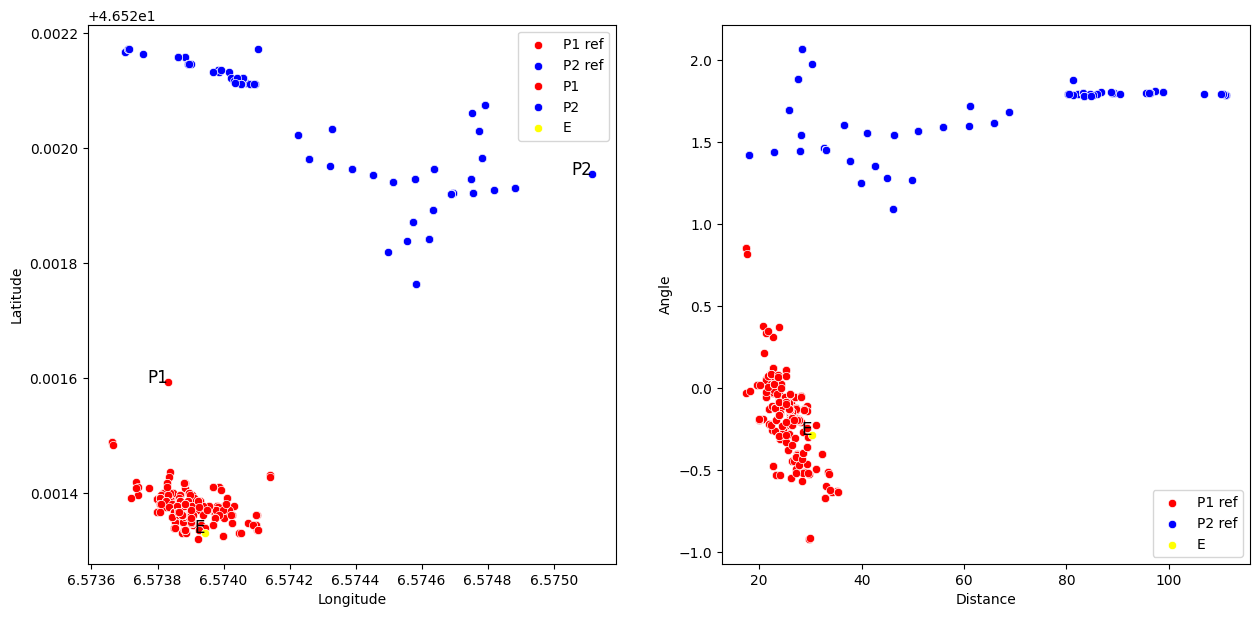

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(data=df_p1, x="Longitude", y="Latitude", ax=ax[0], label="P1 ref", color="red")
sns.scatterplot(data=df_p2, x="Longitude", y="Latitude", ax=ax[0], label="P2 ref", color="blue")
sns.scatterplot(x=[P1[0]], y=[P1[1]], ax=ax[0], label="P1", color="red")
sns.scatterplot(x=[P2[0]], y=[P2[1]], ax=ax[0], label="P2", color="blue")
sns.scatterplot(x=[E[0]], y=[E[1]], ax=ax[0], label="E", color="yellow")
ax[0].text(P1[0], P1[1], "P1", fontsize=12, ha='right')
ax[0].text(P2[0], P2[1], "P2", fontsize=12, ha='right')
ax[0].text(E[0], E[1], "E", fontsize=12, ha='right')

sns.scatterplot(data=df_p1, x="Distance", y="Angle", ax=ax[1], label="P1 ref", color="red")
sns.scatterplot(data=df_p2, x="Distance", y="Angle", ax=ax[1], label="P2 ref", color="blue")
sns.scatterplot(x=[transform_to_rad(P1, E)[0]], y=[transform_to_rad(P1, E)[1]], ax=ax[1], label="E", color="yellow")
ax[1].text(transform_to_rad(P1, E)[0], transform_to_rad(P1, E)[1], "E", fontsize=12, ha='right')

Text(6.573944444, 46.521330555, 'E')

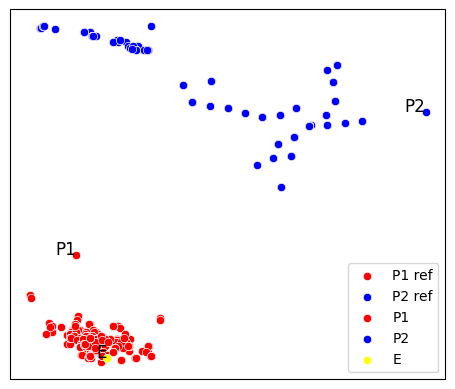

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
# Plot points on the map using Seaborn
sns.scatterplot(data=df_p1, x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), color='red', ax=ax, label="P1 ref")
sns.scatterplot(data=df_p2, x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), color='blue', ax=ax, label="P2 ref")
sns.scatterplot(x=[P1[0]], y=[P1[1]], ax=ax, color='red', transform=ccrs.PlateCarree(), label="P1")
sns.scatterplot(x=[P2[0]], y=[P2[1]], ax=ax, color='blue', transform=ccrs.PlateCarree(), label="P2")
sns.scatterplot(x=[E[0]], y=[E[1]], ax=ax, color='yellow', transform=ccrs.PlateCarree(), label="E")
ax.text(P1[0], P1[1], "P1", fontsize=12, ha='right', transform=ccrs.PlateCarree())
ax.text(P2[0], P2[1], "P2", fontsize=12, ha='right', transform=ccrs.PlateCarree())
ax.text(E[0], E[1], "E", fontsize=12, ha='right', transform=ccrs.PlateCarree())
